In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\blank\scikit_learn_data


In [4]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oliv['data'].shape  

(400, 4096)

In [9]:
oliv['images'].shape

(400, 64, 64)

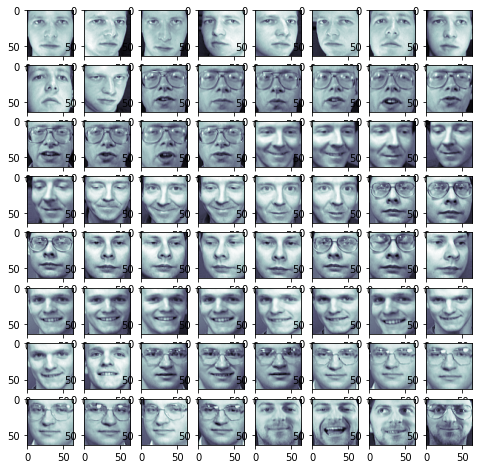

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap = plt.cm.bone)

In [15]:
x = oliv.data
y = oliv.target

In [16]:
pca = PCA()

In [17]:
pca.fit(x)

PCA()

In [18]:
pca.components_.shape

(400, 4096)

In [31]:
k =0
total = sum(pca.explained_variance_)
currentsum=0
while currentsum/total < 0.95:
    currentsum += pca.explained_variance_[k]
    k = k + 1
k

123

In [35]:
pca = PCA(n_components = k,whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [36]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [39]:
x_approx_images = x_approx.reshape((400,64,64))

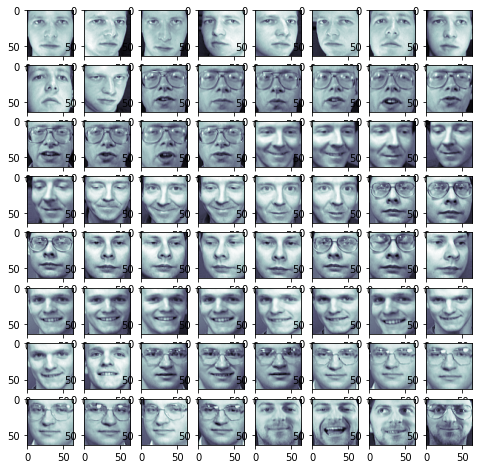

In [41]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap = plt.cm.bone)

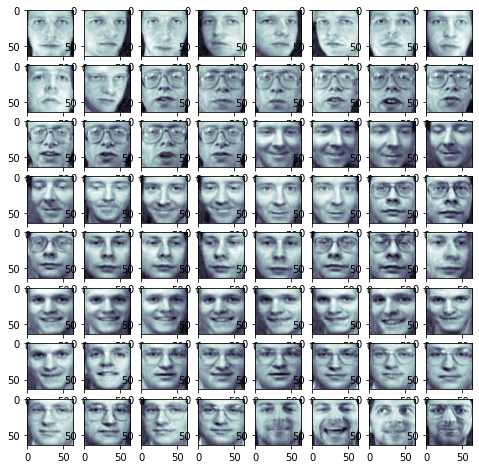

In [42]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap = plt.cm.bone)